In [9]:
%reload_ext autoreload
%autoreload 2

import  random
import glob
import numpy as np
import h5py
from skimage import io
from sklearn.model_selection import train_test_split
import fidle
from myutils.dataset import plot_statistics, labels_to_class_name, images_enhancement, save_h5_dataset


In [10]:
scale      = 0.5
images_dir = './images'
output_dir = './data-{}-scale'.format(scale) 

In [11]:
fidle.override('scale', 'output_dir')
chrono=fidle.Chrono()

In [12]:
def read_images():
    with open(f'{images_dir}/etiquettes.txt','r') as f:
        etiquettes= f.read()
        y=[]
        X=[]
        labels= {}

        i=0
        j=0
        for class_name in etiquettes.split("\n"):
            #labels.append({  "class_name": class_name, "label": i})
            labels[class_name] = i # name to lable
            labels[i]=class_name # labels to name
            for file in glob.glob(f'{images_dir}/{class_name}/*.jpg'):
                image=io.imread(file)
                if len(image.shape)==2:  # images en gray
                    image= np.array([image,image,image])
                    image = np.transpose(image, (1, 2, 0))
                y.append(i)
                X.append(image)
                j=j+1
                fidle.utils.update_progress(class_name,j,len(glob.glob(f'{images_dir}/{class_name}/*.jpg')), verbosity=1)
            i=i+1
            j=0
            
        return np.array(X,dtype=object), np.array(y), labels
            
    

In [13]:
X,y,labels= read_images()

elephant         [########################################] 100.0% of 64
bateau           [########################################] 100.0% of 67
tortue           [########################################] 100.0% of 100
helicoptere      [########################################] 100.0% of 88
kangourou        [########################################] 100.0% of 86
voilier          [########################################] 100.0% of 114
ordinateur       [########################################] 100.0% of 81
guepard          [########################################] 100.0% of 200
homard           [########################################] 100.0% of 41
libellule        [########################################] 100.0% of 40
pizza            [########################################] 100.0% of 53
rhinoceros       [########################################] 100.0% of 59
coq              [########################################] 100.0% of 49
scorpion         [##############################

In [14]:
print("X hsape: ",X.shape)
print("Labels: ",labels)

print(0,"=>",labels[0])
print("elephant","=>",labels['elephant'])

X hsape:  (1666,)
Labels:  {'elephant': 0, 0: 'elephant', 'bateau': 1, 1: 'bateau', 'tortue': 2, 2: 'tortue', 'helicoptere': 3, 3: 'helicoptere', 'kangourou': 4, 4: 'kangourou', 'voilier': 5, 5: 'voilier', 'ordinateur': 6, 6: 'ordinateur', 'guepard': 7, 7: 'guepard', 'homard': 8, 8: 'homard', 'libellule': 9, 9: 'libellule', 'pizza': 10, 10: 'pizza', 'rhinoceros': 11, 11: 'rhinoceros', 'coq': 12, 12: 'coq', 'scorpion': 13, 13: 'scorpion', 'hippocampe': 14, 14: 'hippocampe', 'stop': 15, 15: 'stop', 'tique': 16, 16: 'tique', 'montre': 17, 17: 'montre', 'chaise': 18, 18: 'chaise', 'parapluie': 19, 19: 'parapluie'}
0 => elephant
elephant => 0


In [15]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test  shape : ",x_test.shape)
print("y_test  shape : ",y_test.shape)

x_train shape :  (1332,)
y_train shape :  (1332,)
x_test  shape :  (334,)
y_test  shape :  (334,)


In [17]:
train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

for image in x_train:
    (lx,ly,lz) = image.shape
    train_size.append(lx*ly/1024)
    train_ratio.append(lx/ly)
    train_lx.append(lx)
    train_ly.append(ly)

for image in x_test:
    (lx,ly,lz) = image.shape
    test_size.append(lx*ly/1024)
    test_ratio.append(lx/ly)
    test_lx.append(lx)
    test_ly.append(ly)

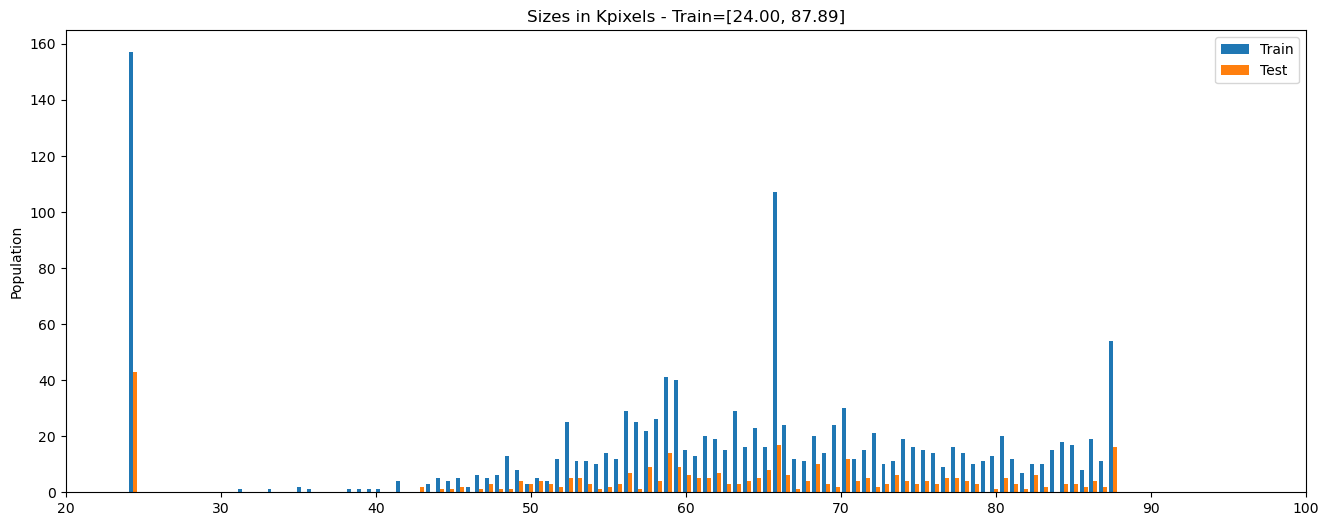

In [18]:
# ------ Statistics / sizes
plot_statistics(train_size,test_size,'Sizes in Kpixels',xlim=[20,100])

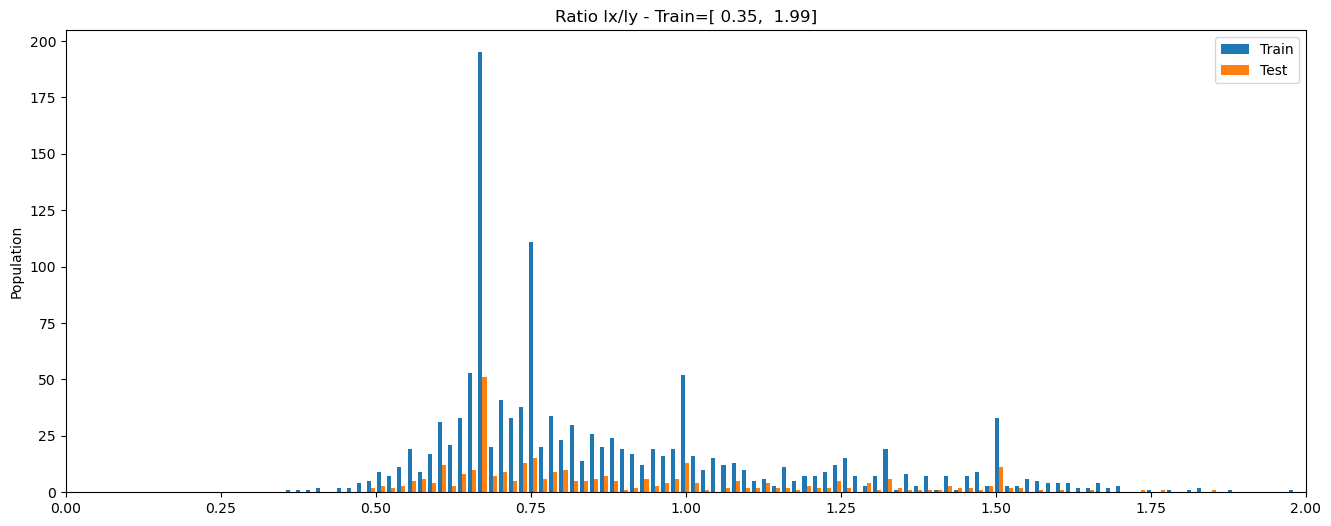

In [19]:
# ------ Statistics / lx/ly
plot_statistics(train_ratio,test_ratio,'Ratio lx/ly',xlim=[0,2])

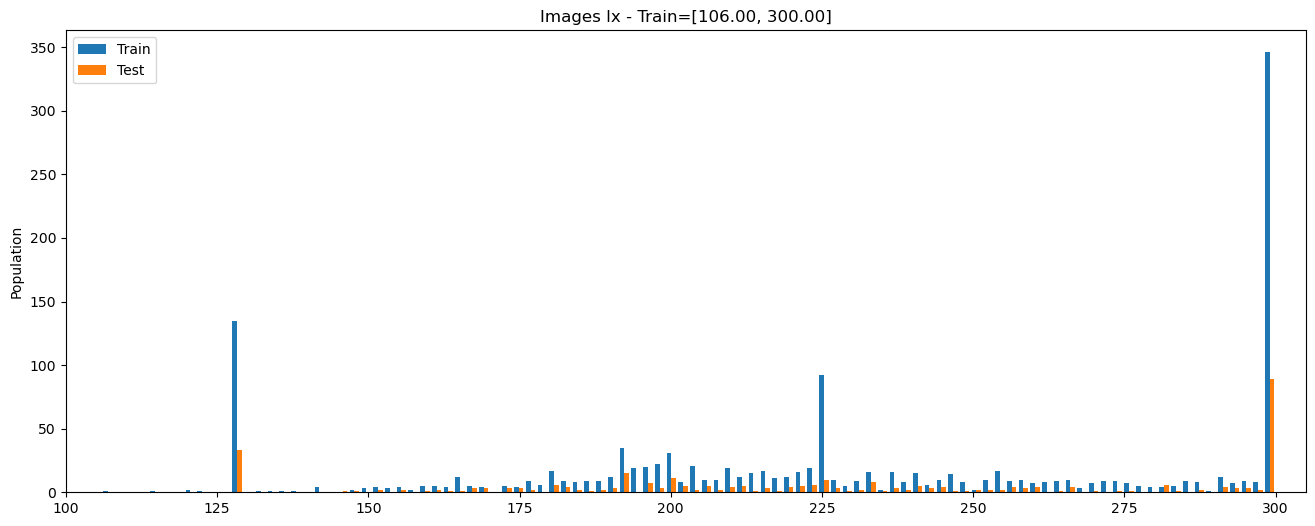

In [20]:
# ------ Statistics / lx
plot_statistics(train_lx,test_lx,'Images lx',xlim=[100,305])

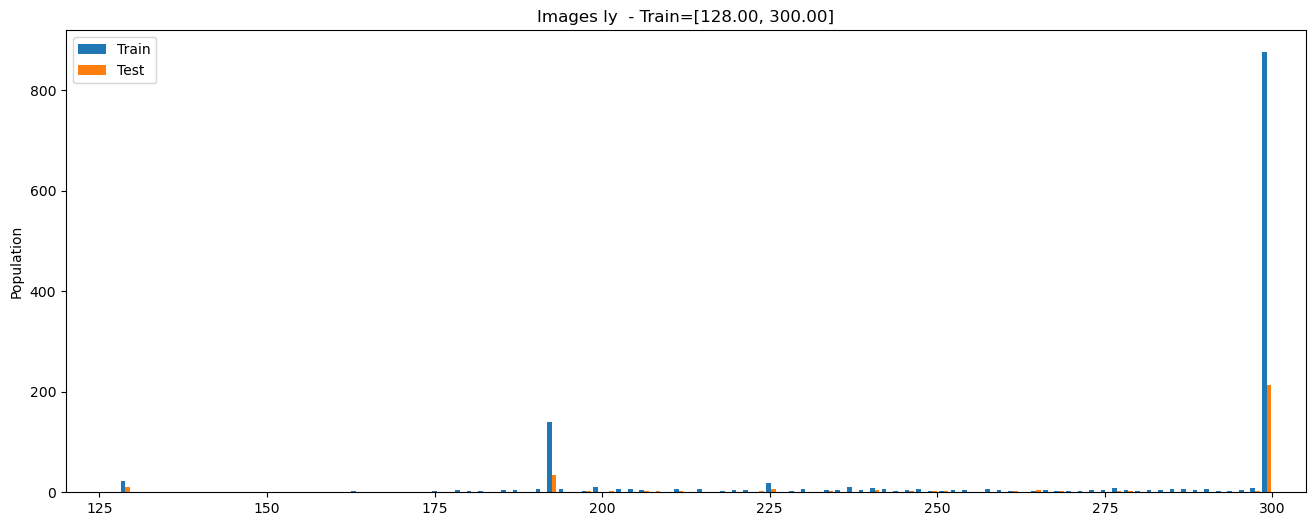

In [21]:
# ------ Statistics / ly
plot_statistics(train_ly,test_ly,'Images ly ',xlim=[120,305])

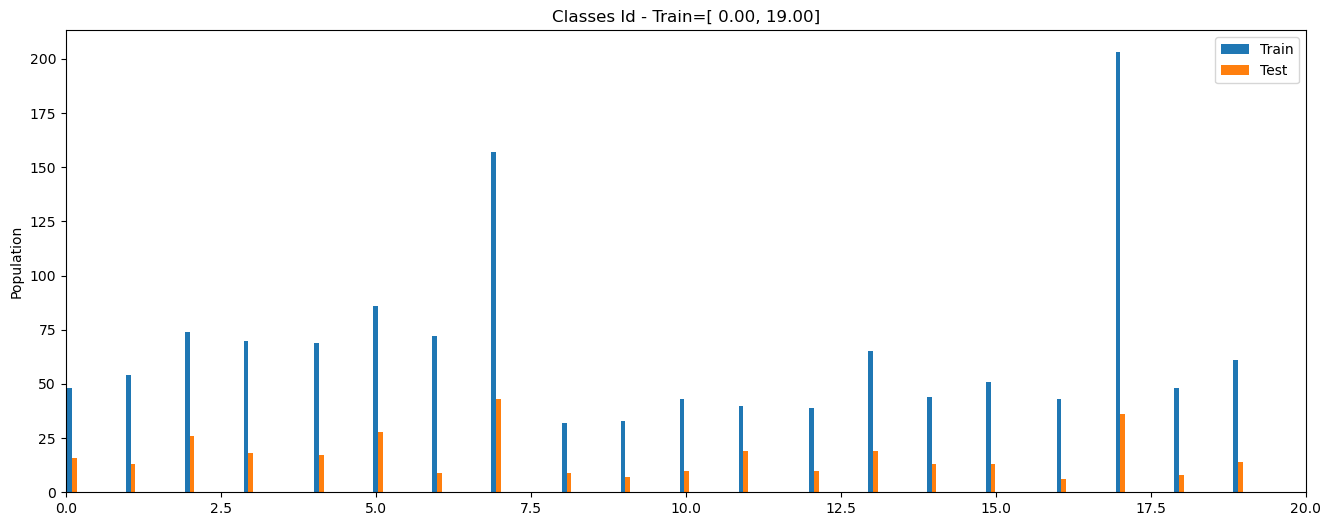

In [22]:
# ------ Statistics / class Id
plot_statistics(y_train,y_test,'Classes Id',xlim=[0,20])

In [23]:
help(fidle.scrawler.images)

Help on function images in module fidle.scrawler:

images(x, y=None, indices='all', columns=12, x_size=1, y_size=1, colorbar=False, y_pred=None, cm='binary', norm=None, y_padding=0.35, spines_alpha=1, fontsize=20, interpolation='lanczos', save_as='auto')
    Show some images in a grid, with legends
    args:
        x             : images - Shapes must be (-1,lx,ly) (-1,lx,ly,1) or (-1,lx,ly,3),(-1,1,lx,ly) or (-1,3,lx,ly)
        y             : real classes or labels or None (None)
        indices       : indices of images to show or 'all' for all ('all')
        columns       : number of columns (12)
        x_size,y_size : figure size (1), (1)
        colorbar      : show colorbar (False)
        y_pred        : predicted classes (None)
        cm            : Matplotlib color map (binary)
        norm          : Matplotlib imshow normalization (None)
        y_padding     : Padding / rows (0.35)
        spines_alpha  : Spines alpha (1.)
        font_size     : Font size in px (20)

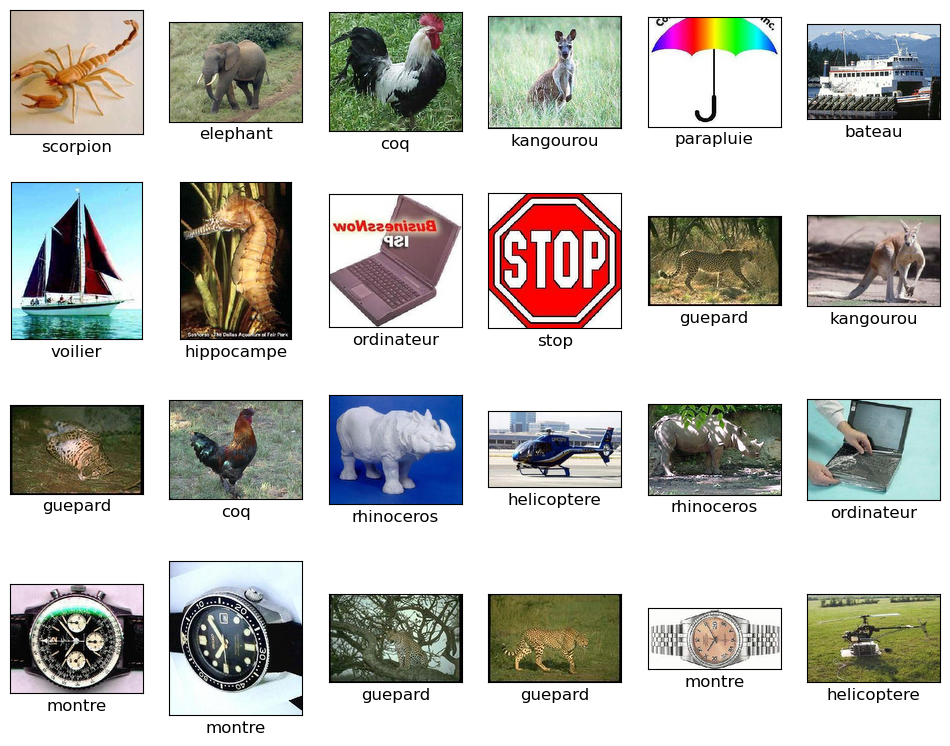

In [24]:
samples = [ random.randint(0,len(x_train)-1) for i in range(24)]
fidle.scrawler.images(x_train,labels_to_class_name(labels,y_train),indices=samples,columns=6,x_size=2, y_size=2,fontsize=12)

Enhancement:     [################] 100.0% of 16
Enhancement:     [################] 100.0% of 16
Enhancement:     [################] 100.0% of 16
Enhancement:     [################] 100.0% of 16
Enhancement:     [################] 100.0% of 16
Enhancement:     [################] 100.0% of 16


<br>**ORIGINAL**

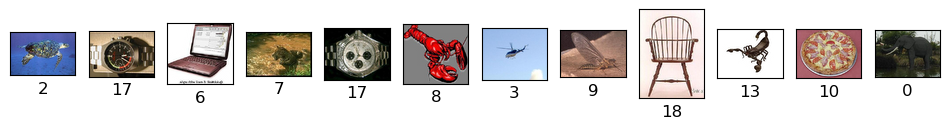

<br>**ENHANCED**

dataset : RGB  min,max=[0.000,1.000]  shape=(16, 25, 25, 3)


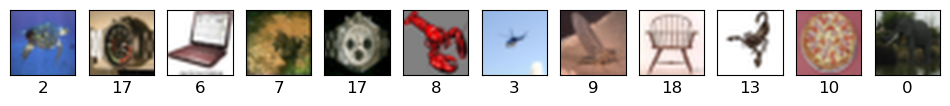

dataset : RGB-HE  min,max=[0.000,1.000]  shape=(16, 25, 25, 3)


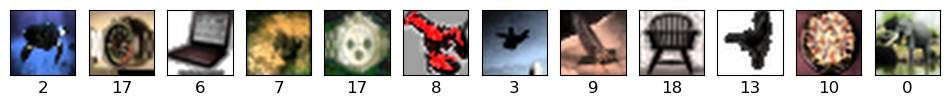

dataset : L  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


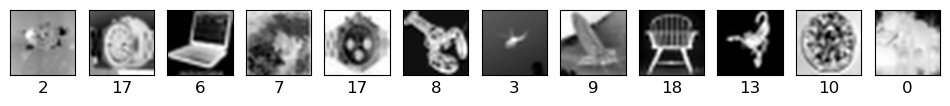

dataset : L-HE  min,max=[0.002,1.000]  shape=(16, 25, 25, 1)


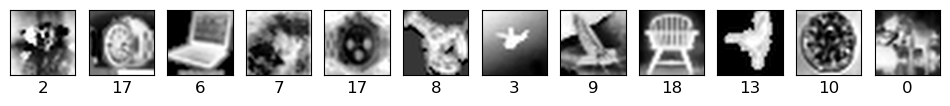

dataset : L-LHE  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


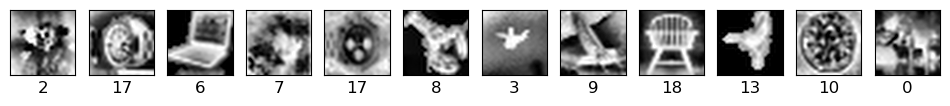

dataset : L-CLAHE  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


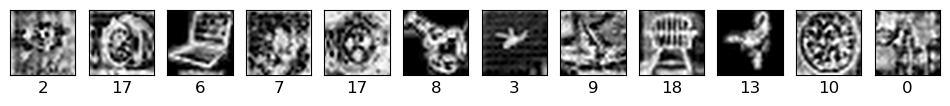

In [25]:
i=random.randint(0,len(x_train)-16)
x_samples = x_train[i:i+16]
y_samples = y_train[i:i+16]

datasets  = {}

datasets['RGB']      = images_enhancement( x_samples, width=25, height=25, mode='RGB'  )
datasets['RGB-HE']   = images_enhancement( x_samples, width=25, height=25, mode='RGB-HE'  )
datasets['L']        = images_enhancement( x_samples, width=25, height=25, mode='L'  )
datasets['L-HE']     = images_enhancement( x_samples, width=25, height=25, mode='L-HE'  )
datasets['L-LHE']    = images_enhancement( x_samples, width=25, height=25, mode='L-LHE'  )
datasets['L-CLAHE']  = images_enhancement( x_samples, width=25, height=25, mode='L-CLAHE'  )


fidle.utils.subtitle('ORIGINAL')
fidle.scrawler.images(x_samples,  y_samples, range(12), columns=12, x_size=1, y_size=1, 
                colorbar=False, y_pred=None, cm='binary', save_as='original-img',fontsize=12)

fidle.utils.subtitle('ENHANCED')
n=10
for k,d in datasets.items():
    print("dataset : {}  min,max=[{:.3f},{:.3f}]  shape={}".format(k,d.min(),d.max(), d.shape))
    fidle.scrawler.images(d, y_samples, range(12), columns=12, x_size=1, y_size=1, 
                    colorbar=False, y_pred=None, cm='binary', save_as=f'{n}-enhanced-{k}',fontsize=12)
    n+=1


In [26]:
chrono.start()
n_train = int( len(x_train)*scale )
n_test  = int( len(x_test)*scale )

print(f'Scale is : {scale}')
print(f'x_train length is : {n_train}')
print(f'x_test  length is : {n_test}')
print(f'output dir is     : {output_dir}\n')

fidle.utils.subtitle('Running...')

fidle.utils.mkdir(output_dir)

for s in [24, 48]:
    for m in ['RGB', 'RGB-HE', 'L', 'L-LHE']:
        filename = f'{output_dir}/set-{s}x{s}-{m}.h5'
        fidle.utils.subtitle(f'Dataset : {filename}')
        x_train_new = images_enhancement( x_train[:n_train], width=s, height=s, mode=m )
        x_test_new  = images_enhancement( x_test[:n_test],  width=s, height=s, mode=m )
        # ---- Save
        save_h5_dataset( x_train_new, y_train[:n_train], x_test_new, y_test[:n_test], labels,  filename)

x_train_new,x_test_new=0,0

chrono.show()

Scale is : 0.5
x_train length is : 666
x_test  length is : 167
output dir is     : ./data-0.5-scale



<br>**Running...**

<br>**Dataset : ./data-0.5-scale/set-24x24-RGB.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-24x24-RGB.h5  shape : (666, 24, 24, 3)       size :   11.0 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-24x24-RGB-HE.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-24x24-RGB-HE.h5  shape : (666, 24, 24, 3)       size :   11.0 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-24x24-L.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-24x24-L.h5  shape : (666, 24, 24, 1)       size :    3.7 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-24x24-L-LHE.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-24x24-L-LHE.h5  shape : (666, 24, 24, 1)       size :    3.7 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-48x48-RGB.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-48x48-RGB.h5  shape : (666, 48, 48, 3)       size :   43.9 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-48x48-RGB-HE.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-48x48-RGB-HE.h5  shape : (666, 48, 48, 3)       size :   43.9 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-48x48-L.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-48x48-L.h5  shape : (666, 48, 48, 1)       size :   14.7 Mo   (saved)


<br>**Dataset : ./data-0.5-scale/set-48x48-L-LHE.h5**

Enhancement:     [########################################] 100.0% of 666
Enhancement:     [########################################] 100.0% of 167
Dataset : ./data-0.5-scale/set-48x48-L-LHE.h5  shape : (666, 48, 48, 1)       size :   14.7 Mo   (saved)
Duration :  24.39 seconds


dataset loaded from h5 file.


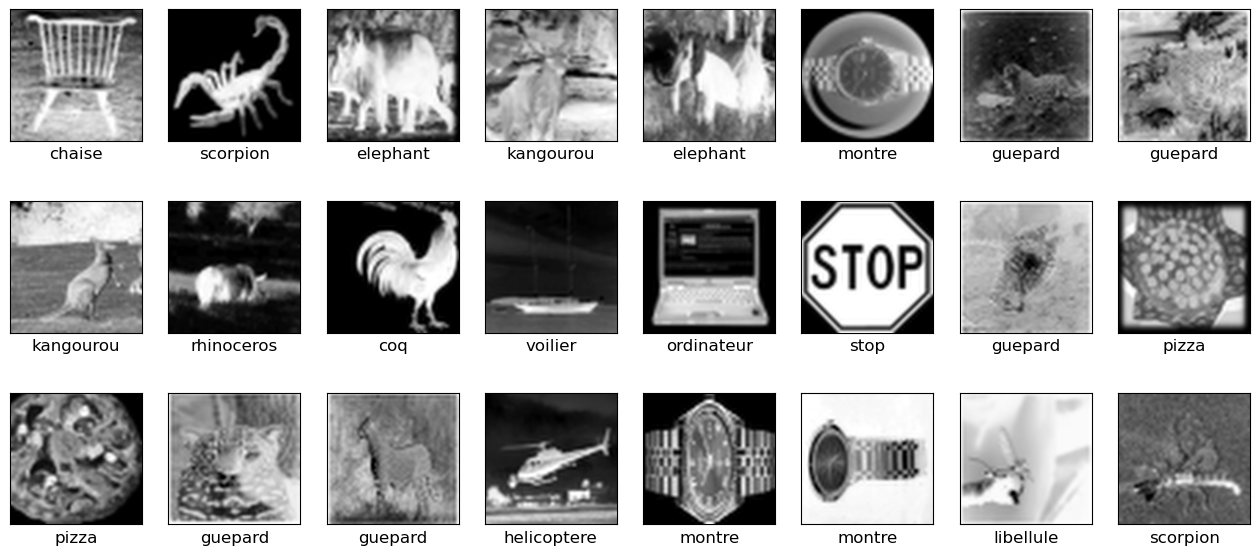

In [27]:

dataset='set-48x48-L'
samples=range(24)

with  h5py.File(f'{output_dir}/{dataset}.h5','r') as f:
    x_tmp = f['x_train'][:]
    y_tmp = f['y_train'][:]
    print("dataset loaded from h5 file.")
fidle.scrawler.images(x_tmp,labels_to_class_name(labels,y_tmp), samples, columns=8, x_size=2, y_size=2, 
                colorbar=False, y_pred=None, cm='binary', save_as='enhanced_images',fontsize=12)

x_tmp,y_tmp=0,0
